In [29]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [23]:
data = pd.read_csv('dataset.csv')
features = data.drop(columns='target')
x_train, x_test, y_train, y_test = \
    train_test_split(features, data['target'], random_state=1)

In [24]:
results_train = []
results_test = []
pipelines = []
neighbors = list(range(1, 25))

In [25]:
for n in neighbors:
    exported_pipeline = KNeighborsClassifier(n, weights='uniform')
    exported_pipeline.fit(x_train, y_train)

    results_train.append(exported_pipeline.score(x_train, y_train))
    results_test.append(exported_pipeline.score(x_test, y_test))
    pipelines.append(exported_pipeline)
    
    exported_pipeline = KNeighborsClassifier(n, weights='distance')
    exported_pipeline.fit(x_train, y_train)

    results_train.append(exported_pipeline.score(x_train, y_train))
    results_test.append(exported_pipeline.score(x_test, y_test))
    pipelines.append(exported_pipeline)

In [26]:
best = results_test.index(max(results_test))
print(f"Score of best model: {results_test[best]}")
print(f"Best choice for number of neighbors: {neighbors[best // 2]}")
print(f"Best choice for weights: {'distance' if best%2 else 'uniform'}")

Score of best model: 0.8825688073394495
Best choice for number of neighbors: 5
Best choice for weights: distance


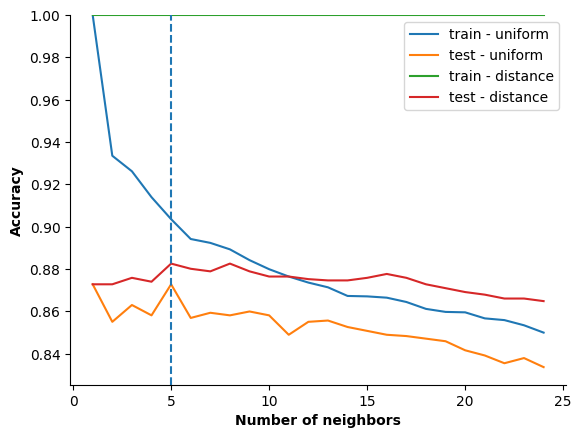

In [51]:
_, ax = plt.subplots()

ax.plot(neighbors, results_train[0::2], label="train - uniform")
ax.plot(neighbors, results_test[0::2], label="test - uniform")
ax.plot(neighbors, results_train[1::2], label="train - distance")
ax.plot(neighbors, results_test[1::2], label="test - distance")

ax.set_ylim(ymax=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Number of neighbors', weight='bold')
ax.set_ylabel('Accuracy', weight='bold')
ax.axvline(x=neighbors[best//2], linestyle='dashed')
ax.legend()

plt.show()

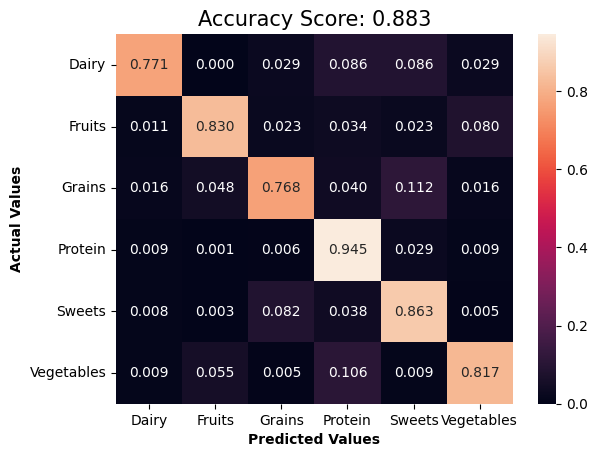

In [50]:
predictions = pipelines[best].predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions, normalize='true')
labels = ('Dairy', 'Fruits', 'Grains', 'Protein', 'Sweets', 'Vegetables')
sns.heatmap(cm1, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Values', weight='bold')
plt.ylabel('Actual Values', weight='bold')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [ ]:
with open('model-nearest-neighbors.joblib', 'wb') as f:
    joblib.dump(pipelines[best], f)